In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 424M/428M [00:04<00:00, 115MB/s]
100% 428M/428M [00:04<00:00, 98.9MB/s]


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')


Dataset is loaded


In [7]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_food_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_shack_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_chain_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_lot_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_wife_happy.wav']

In [8]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [9]:
df['label'].value_counts()

,count
label,
happy,400
fear,400
neutral,400
sad,400
ps,400
angry,400
disgust,400


## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='label'>

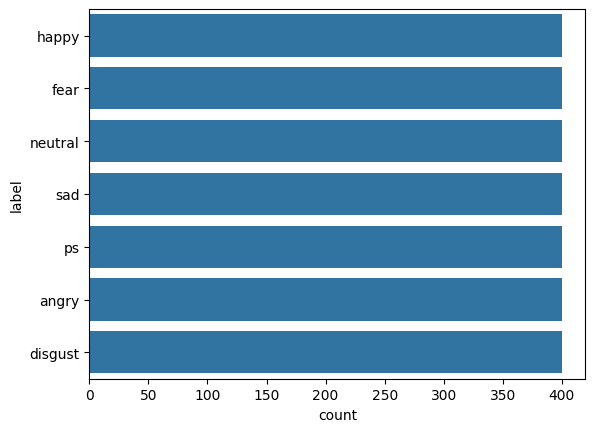

In [10]:
sns.countplot(df['label'])

In [11]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(Emotion, size=10)
  time = np.linspace(0, len(data) / sr, len(data))
  plt.plot(time, data)
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude')
  plt.show()


def spectogram(data, sr, emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(Emotion, size=10)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

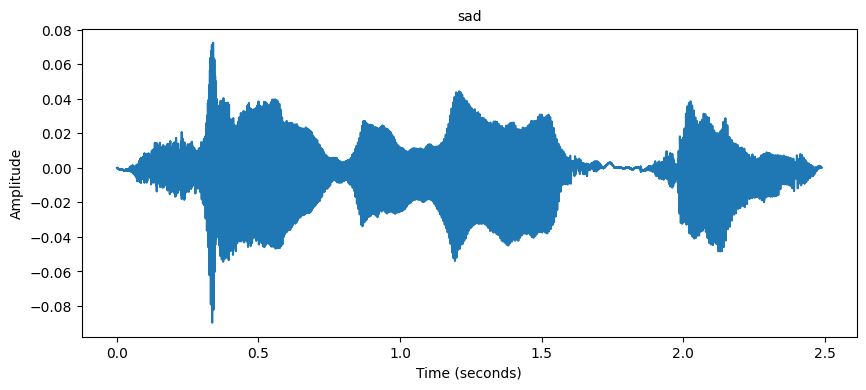

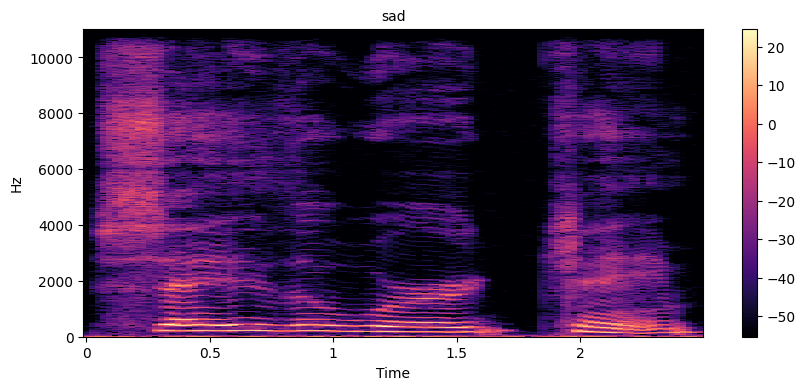

In [12]:
Emotion = 'sad'
path = np.array(df['speech'][df['label']==Emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

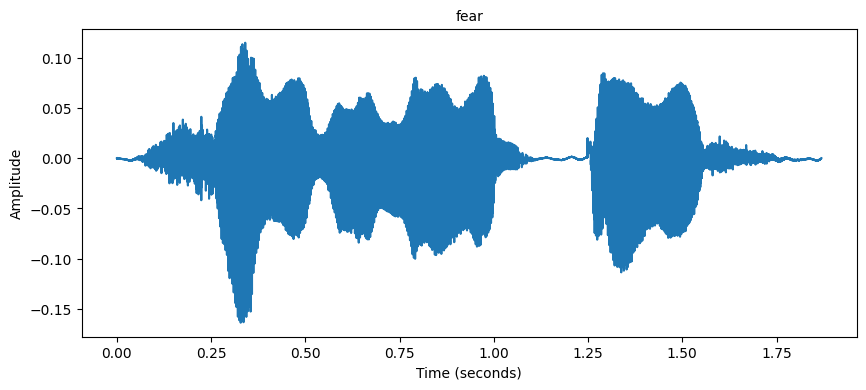

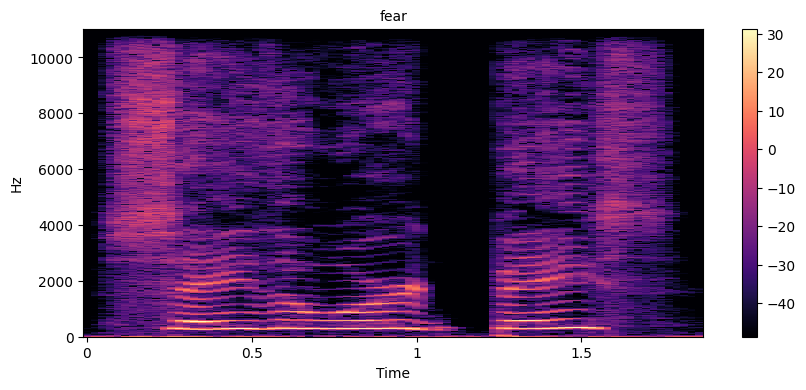

In [13]:
Emotion = 'fear'
path = np.array(df['speech'][df['label']==Emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

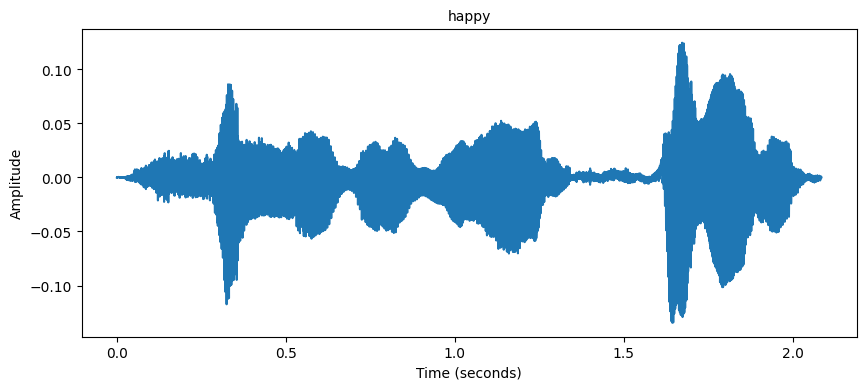

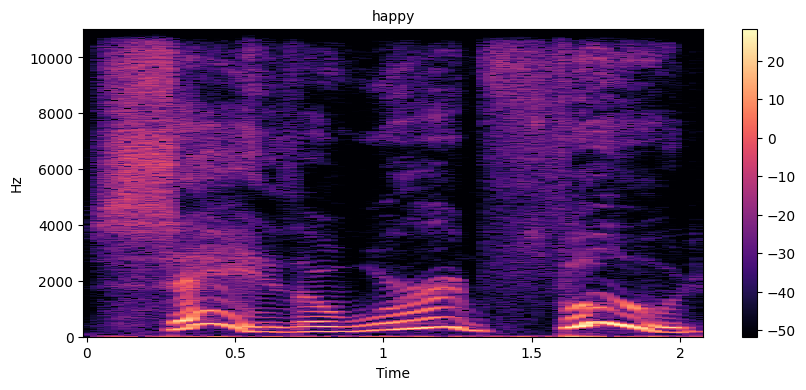

In [14]:
Emotion = 'happy'
path = np.array(df['speech'][df['label']==Emotion])[0]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

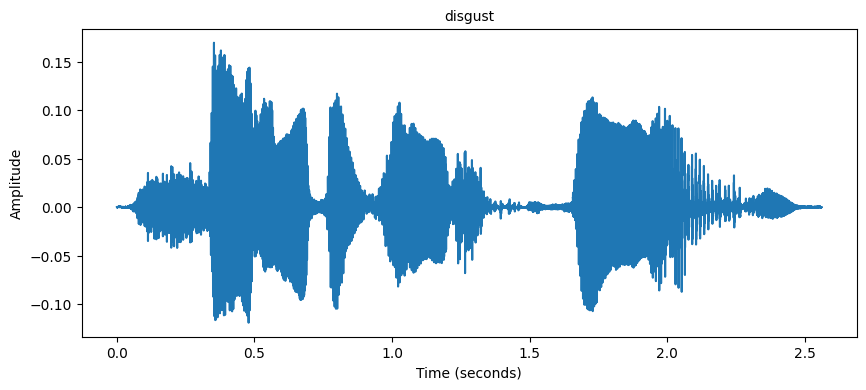

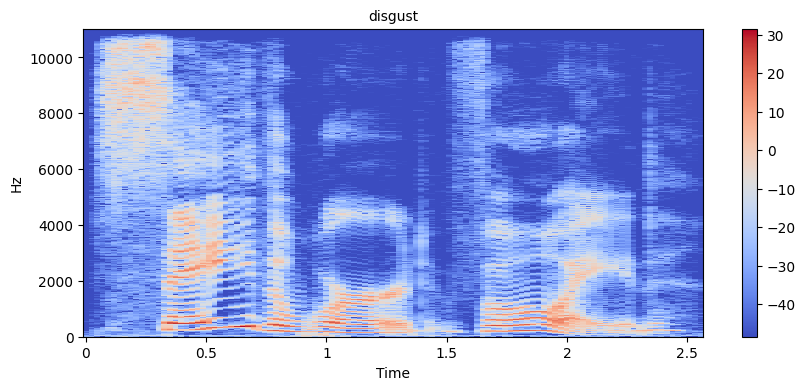

In [15]:
Emotion = 'disgust'
path = np.array(df['speech'][df['label']==Emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

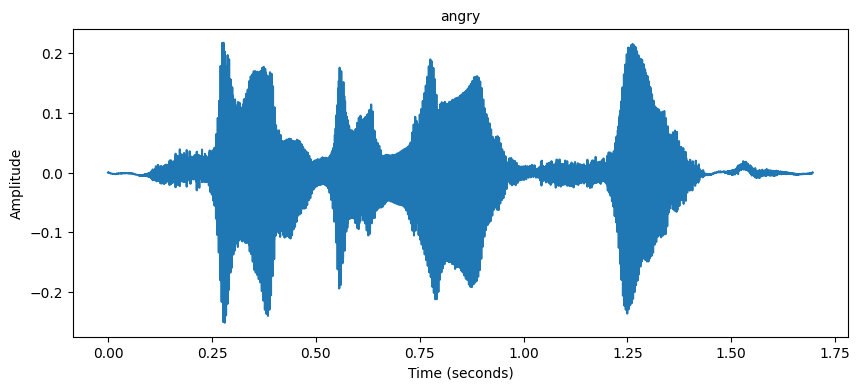

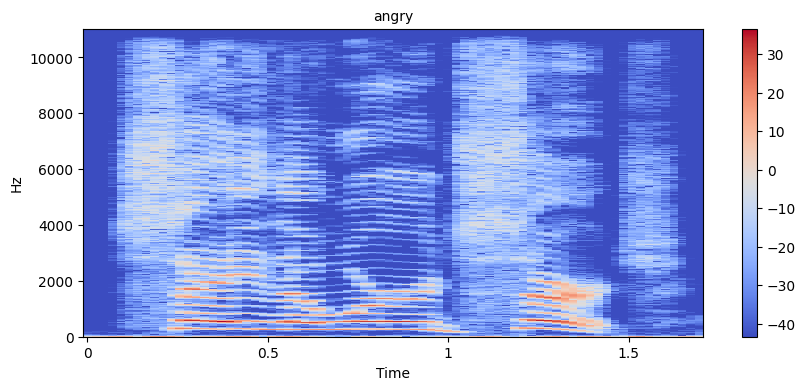

In [16]:
Emotion = 'angry'
path = np.array(df['speech'][df['label']==Emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

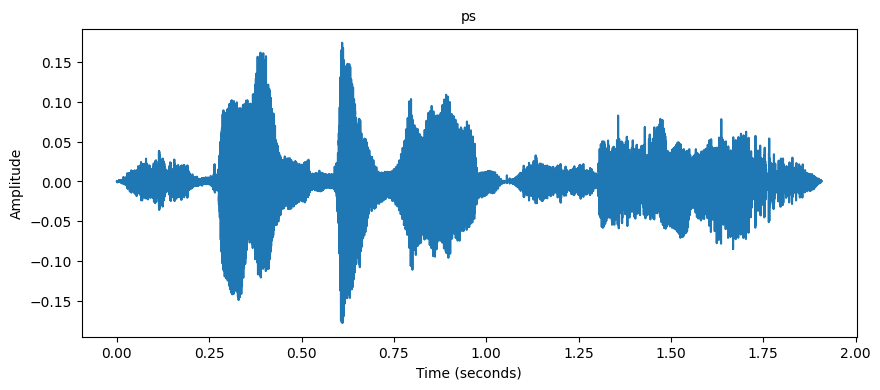

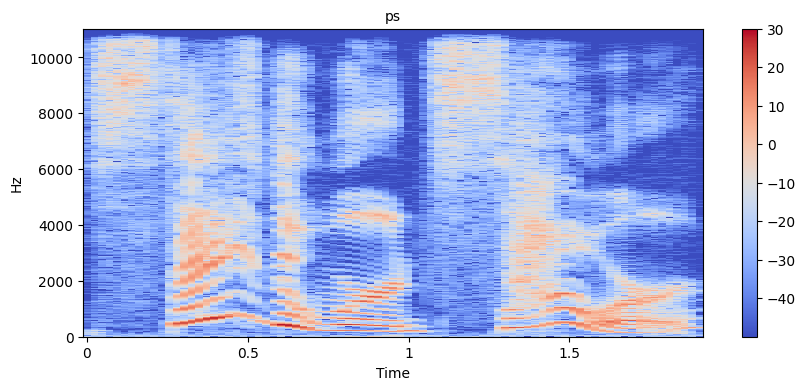

In [17]:
Emotion = 'ps'
path = np.array(df['speech'][df['label']==Emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

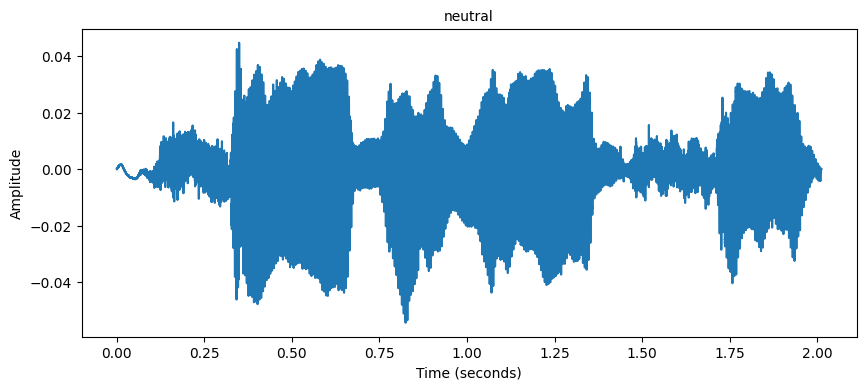

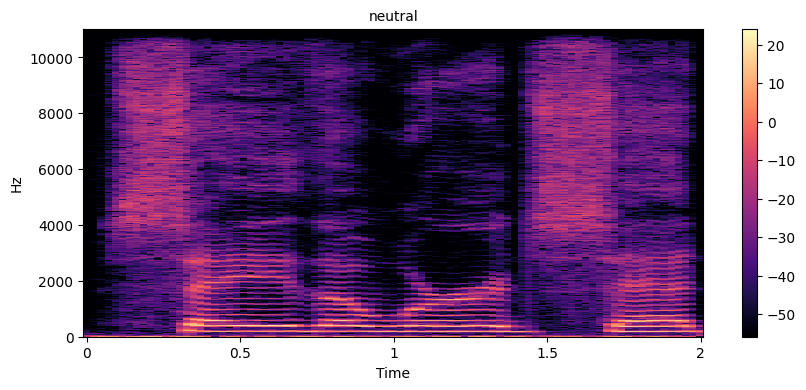

In [18]:
Emotion = 'neutral'
path = np.array(df['speech'][df['label']==Emotion])[1]
data, sampling_rate=librosa.load(path)
waveplot(data,sampling_rate, Emotion)
spectogram(data, sampling_rate, Emotion)
Audio(path)

##Feature Extraction


In [19]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename,duration=3, offset=0.5)
  mfcc= np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [21]:
extract_mfcc(df['speech'][0])

array([-4.6461288e+02,  9.4157387e+01,  3.5021343e+01, -1.2655700e+01,
        1.0040774e+01, -4.4343538e+00, -2.0148716e+00, -3.6623037e+00,
       -1.7738718e+01, -9.2568026e+00, -2.1087746e+01, -7.3126335e+00,
       -3.9997637e+00, -3.1835990e+00,  1.3779221e+00, -1.6706110e+00,
       -1.5142599e+00,  5.3398647e+00,  4.7736259e+00,  3.8660386e+00,
        4.9905667e+00,  7.1242127e+00, -1.1613668e-01,  4.9120040e+00,
       -4.5117464e+00,  7.4244385e+00, -1.7752374e+00,  8.4940825e+00,
        1.5900394e-01,  6.7614374e+00, -8.1230116e-01,  2.3832777e+00,
        1.6865842e+00,  9.8166370e-01, -1.7687228e-01,  5.4028902e+00,
        4.5265226e+00,  9.0100241e+00,  1.0677425e+01,  1.4570445e+01],
      dtype=float32)

In [20]:
X_mfcc= df['speech'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

,speech
0,"[-464.61288, 94.15739, 35.021343, -12.6557, 10..."
1,"[-433.13245, 81.420746, -1.5351787, -5.3273935..."
2,"[-461.8316, 87.71656, 22.845173, 13.628971, 7...."
3,"[-427.3091, 114.52821, 20.452835, -15.900227, ..."
4,"[-452.87973, 104.957016, 26.652924, -7.4148507..."
...,...
2795,"[-486.7717, 115.7047, 18.785555, -10.474499, 1..."
2796,"[-479.9252, 112.73285, 38.530167, 2.6674528, 2..."
2797,"[-420.2445, 91.05216, 18.892618, -22.403215, -..."
2798,"[-446.2353, 122.961105, 13.020325, -2.429566, ..."


In [23]:
X = np.array([x for x in X_mfcc])

In [24]:
#input split
X=np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
y = enc.fit_transform(df[['label']])
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')



## Create LSTM Model

In [26]:
import keras
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(32, return_sequences=False, input_shape=(40, 1), kernel_regularizer=l2(0.02)),
    Dropout(0.4),  # Increased dropout rate
    Dense(32, activation='relu'),
    Dropout(0.4),  # Increased dropout rate
    Dense(32, activation='relu'),
    Dropout(0.4),  # Increased dropout rate
    Dense(7, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,695 (26.15 KB)

 Trainable params: 6,695 (26.15 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:


history = model.fit(X, y,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=64,
                    shuffle=True,
                    )


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1546 - loss: 2.0633 - val_accuracy: 0.0804 - val_loss: 2.1097
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2549 - loss: 1.8838 - val_accuracy: 0.2625 - val_loss: 2.0936
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3132 - loss: 1.7657 - val_accuracy: 0.2821 - val_loss: 2.0437
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4100 - loss: 1.5499 - val_accuracy: 0.2875 - val_loss: 2.0715
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4932 - loss: 1.2993 - val_accuracy: 0.2929 - val_loss: 2.2996
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5816 - loss: 1.1249 - val_accuracy: 0.3089 - val_loss: 2.2485
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6367 - loss: 0.9855 - val_accuracy: 0.3786 - val_loss: 2.1796
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6920 - loss: 0.8430 - val_accuracy: 0.4500 - val_loss

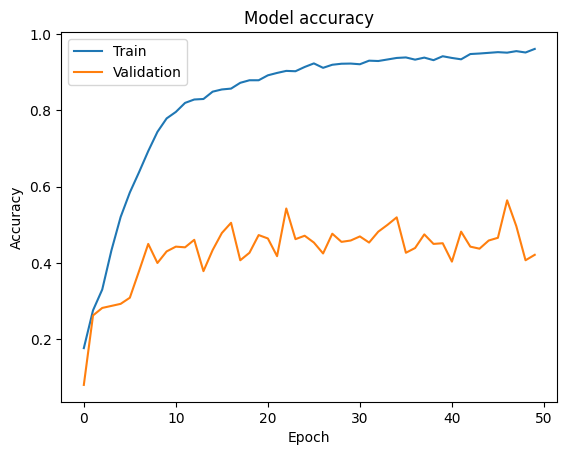

Overall Accuracy: 0.8774999976158142


In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the final model accuracy
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Overall Accuracy: {accuracy}")
